# Make your code reproducible
#### (Prepared by Sarah Siddiqui, University of Rochester River Campus Libraries)
### These tips are based on R but can be applied to other programming languages as well

## Tip # 1
##### Use meaningful variable names and include dependencies - packages and libraries
##### Including comments is *always* recommended!

In [29]:
#install.packages("ggplot2")
#Add the packages installed as a comment, since it is done only once but helpful for other users

In [11]:
library(ggplot2) 

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [12]:
library(caret) # why are you importing this? Where are you using this??

Loading required package: lattice


In [19]:
sessionInfo() #save this information as some libraries may not work with all versions of R

R version 3.6.1 (2019-07-05)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 18362)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] caret_6.0-83    lattice_0.20-38 ggplot2_3.1.1  

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-3       tidyselect_0.2.5   repr_0.19.2        purrr_0.3.2       
 [5] reshape2_1.4.3     splines_3.6.1      colorspace_1.4-1   generics_0.0.2    
 [9] stats4_3.6.1       htmltools_0.3.6    base64enc_0.1-3    survival_2.44-1.1 
[13] prodlim_2018.04.18 rlang_0.3.4        ModelMetrics_1.2.2 pillar_1.3.1      
[17] glue_1.3.1         withr_2.1.2        uuid_0.1-2         foreach_1.4.4     
[21] plyr

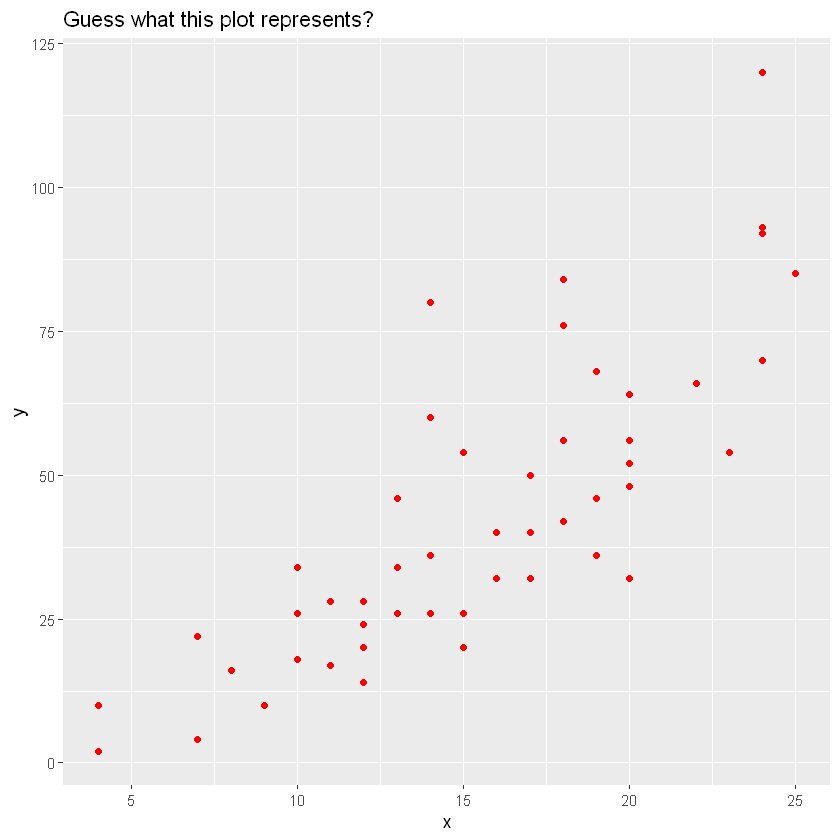

In [22]:
data(cars)
x<- cars$speed
y<- cars$ dist
ggplot(cars, aes(x=x, y=y))+geom_point(color="red") + labs(title="Guess what this plot represents?")


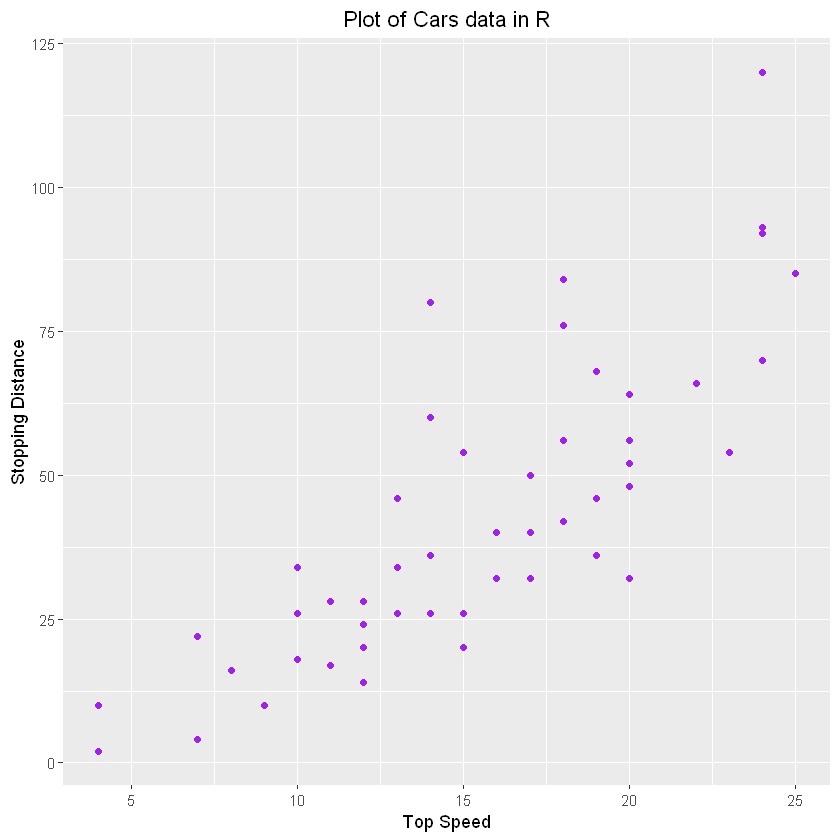

In [28]:
ggplot(cars, aes(x=speed, y=dist))+geom_point(color="purple")+labs(x="Top Speed", y="Stopping Distance", title="Plot of Cars data in R")+theme(plot.title = element_text(hjust = 0.5))

## Tip # 2
##### Use relative file paths, not absolute

In [8]:
dataerr<-read.csv("C:\\Users\\AllegraT\\Desktop\\Reproducibility\\output.csv") # This will not work for everyone!

Warning message in file(file, "rt"):
"cannot open file 'C:\Users\AllegraT\Desktop\Reproducibility\output.csv': No such file or directory"

ERROR: Error in file(file, "rt"): cannot open the connection


In [14]:
df<- read.csv("../Reproducibility/output.csv") #will work as the Reproducbility folder can be shared

## Tip # 3
##### Processing data

###### Save any parameters used for modifying data, for example we're modifying a column in the iris dataset

In [3]:
data(iris)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [4]:
normalize <- function(x) {   
return ((x - min(x)) / (max(x) - min(x)))
}
# Note: we'll talk about functions in a bit!

In [5]:
iris$Sepal.Length.norm <-normalize(iris$Sepal.Length)

In [10]:
head(iris$Sepal.Length.norm)

[1] 0.22222222 0.16666667 0.11111111 0.08333333 0.19444444 0.30555556

##### It's also useful to export the modified data to a separate file for later. Here we are splitting the mtcars data into train and test sets

In [27]:
data("mtcars")

In [28]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [31]:
nrow(mtcars)

[1] 32

In [35]:
n = nrow(mtcars)
trainIndex = sample(1:n, size = round(0.8*n), replace=FALSE)
train = mtcars[trainIndex , 1:7]
test = mtcars[-trainIndex , 1:7]

In [37]:
nrow(train)
nrow(test)

[1] 26

[1] 6

##### Going back to file and variable names, choose meaningful and concise names!

In [46]:
write.csv(train, "C:\\Users\\SarahS\\Desktop\\Reproducibility\\mtcarstrain.csv")
write.csv(test, "C:\\Users\\SarahS\\Desktop\\Reproducibility\\mtcarstest.csv")

## Tip # 4
##### Use functions instead of repeating code to avoid duplication and minimize possibilities of error

In [15]:
#Calculate the hypotenuse
hypotenuse<-function(a,b){
    print(sqrt(a^2+b^2))
}

In [17]:
side1 = 3
side2 = 4
hyp = hypotenuse(side1,side2)

[1] 6.324555


In [18]:
sidea = 7
sideb = 2
hyp_a = hypotenuse(sidea,sideb)

[1] 7.28011


## Tip # 5
###### Using random numbers? Set a seed so you always get the same output

In [47]:
rnorm(10) # The numbers change every time you run the cell

[1] -2.10086995  0.94181258  0.09223751 -0.12615355 -1.98776089  0.59051152
 [7] -0.98194996 -0.87441704 -0.10144020  1.10798296

In [13]:
set.seed(99)
rnorm(10)
#Same output with seed

[1]  0.2139625  0.4796581  0.0878287  0.4438585 -0.3628379  0.1226740
 [7] -0.8638452  0.4896243 -0.3641169 -1.2942420